Identificación de rostros

### Temas Principales

- Matrices

## Introducción

Utilizando una base de datos, con rostros de personas (datos de _entrenamiento_ ) es posible preparar un **modelo** que ayude a identificar rostros en un nuevo conjunto de datos con rostros de personas (datos de _prueba_ ). La técnica que se va a utilizar en este proyecto, está basada en la idea de encontrar un conjunto de _eigenvectores_ para cada persona y luego utilizarlo para **clasificar** nuevos rostros.

La idea fue presentada originalmente por Sirovich y Kirby en 1987 (**L. Sirovich and M. Kirby** (1987). _Low-dimensional procedure for the characterization of human faces_. `Journal of the Optical Society of America A 4 (3): 519–524`) e implementada por Turk  y Pentland en 1991 (**M. Turk and A. Pentland** (1991). _Face recognition using eigenfaces_. `Proc. IEEE Conference on Computer Vision and Pattern Recognition. pp. 586–591.`).

## Preguntas a responder

1. Descarga un conjunto de prueba del **LFW**, verifica que todos las imagenes están estandarizadas en tamaño y vienen en escala de grises. Tiene que haber 10 clases. Guarda estas imágenes en una carpeta llamada `originales`. Esto es muy importante, ya que los resultados deben de ser reproducibles.
2. Describe las imagenes obtenidas ¿Cuáles son las etiquetas? ¿Cuántas imágenes hay de cada etiqueta? Crea carpetas con los nombres de las etiquetas y guarda las imágenes correspondientes ahí.
3. Crea una función que muestre en una matriz de imágenes de $m \times n$ un conjunto aleatorio del conjunto de datos en `originales`.
4. Crea una función que calcule el rostro promedio de un personaje en particular. 
5. Crea una función que muestre el rostro promedio de un personaje en particular.
6. Guarda los rostros promedios en una carpeta `promedios` usando el nombre de la etiqueta.
7. De cada etiqueta, separala en dos grupos, uno de _entrenamiento_ (cada personaje con el mismo número de imagenes) y uno de _prueba_ (el restante).
8. Crea una matriz $\mathcal{M}$ con las imagenes de _entrenamiento_ puestas en un vector.
9. Calcula la matriz de **correlación** $\mathcal{C} = \mathcal{M}^T\mathcal{M}$. ¿Por qué es una matriz de correlación?
10. Obtén los primeros $30$ _vectores_ y _valores propios_ de $\mathcal{C}$.
11. Toma cada uno de los _vectores propios_ y muéstralos como imagen.
12. Muestra en una gráfica los _valores propios_ , ordenados de mayor a menor.
13. Crea una función que calcule la representación de una imagen en los _vectores propios_. Esto se hace tomando la _proyección_ de la imagen en los _vectores propios_ . ¿Por qué? 
14. Utiliza esa función con las imágenes promedio, esto te da la representación única de cada personaje. Dibuja los coeficientes de esta proyección en una gráfica, esto de da la _firma_ de cada personaje.
15. Muestra la imagen _reconstruida_ a partir de los vectores propios. 
16. Crea una función que devuelva la diferencia:

$$
E_j = \frac{||c_j - c_{nueva}||}{||c_j||}
$$

donde $c_j$ es cada una de las imágenes del personaje en el conjunto de _entrenamiento_ y $c_{nueva}$ es una imagen que no es de entrenamiento. Muestra en una gráfica la distancia por cada imagen.

17 Utiliza una [**matriz de confusión**](http://en.wikipedia.org/wiki/Confusion_matrix) para mostrar que tan efectivo es el reconocimiento de imágenes.

## Datos

Utilizar imágenes del [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/). Para obtenerlas de una manera más fácil, se puede usar la función `sklearn.datasets.fetch_lfw_people`.

Libreria faces:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

https://github.com/scikit-learn/scikit-learn/blob/0fb307bf3/sklearn/datasets/_lfw.py#L219

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [1]:
def inicializacion():

    #libreria para descargar las imagenes
    from sklearn.datasets import fetch_lfw_people

    import numpy as np

    #min_faces_per_person --> minimo de cantidad de imagenes de esa persona
    #resize --> proporcion de la imagen
    #funneled --> para las imagenes estandarizadas
    #download_if_missing --> descargar las imagenes si no estan
    #data_home --> directorio cache
    #color --> color o blanco y negro
    caras = fetch_lfw_people(min_faces_per_person=150, resize=.5,  funneled=True, color=False, 
                             download_if_missing=True, data_home="Data")

    #Informacion general sobre las imagenes
    #cada linea en images es una imagen (como matriz)
    num_caras, ancho, alto = caras.images.shape  

    #Data son todas las imagenes puestas como fila (los pixeles)
    #(num_caras, (ancho*alto))
    img_fila = caras.data

    #Id de nombre al que corresponde cada imagen (en orden)
    Id = caras.target

    #Nombres con el indice como Id
    nombres = caras.target_names

    #Todas las imagenes
    imagenes = caras.images
    
    return num_caras, ancho, alto, img_fila, Id, nombres, imagenes

In [2]:
def carpetas():

    #Vamos a guardar las imagenes originales

    #importamos libreria del sistema
    import os

    #importamos libreria para eliminar el directorio si existe
    import shutil

    #Creamos el directorio si existe lo eliminamos y escribimos de nuevo
    if not os.path.exists("originales"):
        os.makedirs("originales")
    else:
        shutil.rmtree("originales") # Borra el directorio -rf
        os.makedirs("originales")

    #Creamos una carpeta con cada nombre
    for nombre in nombres:
        os.makedirs("originales/" + nombre)

    #Para visualizar y guardar las imagenes que tenemos
    import matplotlib.pyplot as plt

    #Recorremos cada Id de imagen para asignarla en su carpeta
    #La estamos guardando en su respectiva carpeta con el indice original
    for i in range(len(Id)):
        directory = "originales/" + str(nombres[Id[i]]) + "/" + str(i) + ".png"
        plt.imsave(directory, imagenes[i], cmap="gray")
        

In [3]:
def muestra_aleatoria():

    import os
    import random
    import matplotlib.pyplot as plt
    import numpy as np
    import shutil

    #Creamos el directorio muestra
    if not os.path.exists("muestra"):
        os.makedirs("muestra")
    else:
        shutil.rmtree("muestra") # Borra el directorio -rf
        os.makedirs("muestra")
        
    #Creamos el directorio prueba
    if not os.path.exists("prueba"):
        os.makedirs("prueba")
    else:
        shutil.rmtree("prueba") # Borra el directorio -rf
        os.makedirs("prueba")
    
    #Recorremos cada nombre que existe
    for nombre in os.listdir("originales/"):
        
        #Creamos nuestro arreglo que va a contener la muestra de imagenes en fila
        muestra_fila=[]
        
        #Elegimos la muestra aleatoria
        imagenes_aleatorias = random.choices(os.listdir("originales/"+nombre), 
                                             k=int(.8*len(os.listdir("originales/" + nombre))))
        
        #Recorremos las imagenes seleccionadas
        for img in imagenes_aleatorias:
            
            #Leemos las imagenes
            imagen = plt.imread("originales/"+nombre+"/"+img)
            
            #convertimos el tamaño de la imagen
            imagen = imagen[:,:,0].reshape(ancho*alto)
            
            #agregamos la imagen
            muestra_fila.append(imagen)
        
        #Guardamos la muestra como un csv
        np.savetxt(fname=("muestra/"+nombre+".csv"), X=muestra_fila ,delimiter=",")
        
        
        complemento = [item for item in os.listdir("originales/"+nombre) if item not in imagenes_aleatorias]
        complemento = np.array(complemento)
        np.savetxt(fname=("prueba/"+nombre+".csv"), X=complemento ,delimiter=",", fmt='%s')


In [4]:
def rostro_promedio():
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import shutil

    #Creamos el directorio promedios
    if not os.path.exists("promedios"):
        os.makedirs("promedios")
    else:
        shutil.rmtree("promedios") # Borra el directorio -rf
        os.makedirs("promedios")

    #Para cada nombre que existe, sacamos el promedio
    for nombre in os.listdir("originales/"):
        im_prom = np.loadtxt(fname=("muestra/"+nombre+".csv"),delimiter=',')
        im_prom = np.mean(im_prom, axis=0).reshape(ancho,alto)
        
        #Guardammos el rostro promedio como imagen
        plt.imsave("promedios/"+nombre+".png" ,im_prom, cmap="gray")

In [77]:
def eigenfaces():
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    import shutil

    #Creamos directorio graficas
    if not os.path.exists("graficas-eigenvalores"):
        os.makedirs("graficas-eigenvalores")
    else:
        shutil.rmtree("graficas-eigenvalores") # Borra el directorio -rf
        os.makedirs("graficas-eigenvalores")

    #Creamos directorio eigenfaces
    if not os.path.exists("eigenfaces"):
        os.makedirs("eigenfaces")
    else:
        shutil.rmtree("eigenfaces") # Borra el directorio -rf
        os.makedirs("eigenfaces")

    #Creamos directorio eigenfaces-csv
    if not os.path.exists("eigenfaces-csv"):
        os.makedirs("eigenfaces-csv")
    else:
        shutil.rmtree("eigenfaces-csv") # Borra el directorio -rf
        os.makedirs("eigenfaces-csv")

    for nombre in os.listdir("originales/"):
        media = plt.imread("promedios/"+nombre+".png")
        media = media[:,:,0].reshape(ancho*alto)
        muestra = np.loadtxt(fname=("muestra/"+nombre+".csv"),delimiter=',')
        M = muestra - media
        correlacion = np.dot(M.transpose(), M) / len(media)
        eigen = np.linalg.eigh(correlacion) #calcula ambos
        eigen_values = eigen[0]
        eigen_faces = eigen[1] #eigen_vectors
        
        matriz_eigen = []
        for i in range(1,31): ###########teniamos 31
            matriz_eigen.append(eigen_faces[:,-i])
        matriz_eigen = np.array(matriz_eigen).transpose()
        np.savetxt(fname=("eigenfaces-csv/"+nombre+".csv"), X=matriz_eigen ,delimiter=",")

        #Grafica eigenvalues #teniamos 29     #teniamos 30
        plt.scatter(range(0,29) ,eigen_values[-30:-1][::-1], label="Eigenvalores")
        plt.title("30 eigenvalores más altos de "+nombre)
        plt.ylabel("Eigenvalores")
        plt.savefig("graficas-eigenvalores/"+nombre+".png")
        plt.clf()

        #Creamos directorio nombre
        if not os.path.exists("eigenfaces/"+nombre):
            os.makedirs("eigenfaces/"+nombre)
        else:
            shutil.rmtree("eigenfaces/"+nombre) # Borra el directorio -rf
            os.makedirs("eigenfaces/"+nombre)

        for i in range(1,31): #teniamos 31
            plt.imsave(("eigenfaces/"+nombre+"/"+str(i)+".png"),eigen_faces[:,-i].reshape(ancho,alto), cmap='gray')

In [78]:
eigenfaces()

<Figure size 432x288 with 0 Axes>

In [79]:
def Error (direccion = ("originales/"+"George W Bush"+"/"+"103.png") ):  
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    
    errores = []

    imagen = plt.imread(direccion)
    imagen = imagen[:,:,0].reshape(ancho*alto)

    for nombre in os.listdir("originales/"):
        
        promedio = plt.imread("promedios/"+nombre+".png")
        promedio = promedio[:,:,0].reshape(ancho*alto)

        eigen = np.loadtxt(fname=("eigenfaces-csv/"+nombre+".csv"),delimiter=',')
        
        coeficientes = np.dot(imagen, eigen)

        proyeccion = np.dot(eigen, coeficientes) #+ promedio

        dif = proyeccion - imagen
        
        E = np.linalg.norm(dif) / np.linalg.norm(proyeccion)

        errores.append(E)
    
    return errores

In [80]:
errores =Error()

In [81]:
errores

[0.16948778338554524, 0.14005293959344758]

In [82]:
def parentesco (errores):
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(10,8))
    plt.scatter(range(len(nombres)), errores, s=100)
    plt.xticks(range(len(nombres)), nombres, rotation=20)
    plt.ylim(0,1)
    for i in range(len(errores)):
        plt.annotate(round(errores[i],4), (i-.1, errores[i]+.05 ))
    plt.title("Errores vs persona")
    
    plt.text((len(errores)-1)/2, -.2, "Usted tiene mayor parentesco con " + nombres[np.argmin(errores)],
             size=15, rotation = 0, ha="center", va="center", 
             bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))

In [83]:
def confusion():
    import os
    import numpy as np

    exacto = []
    predicted = []

    for nombre in os.listdir("originales/"):
        complemento = np.loadtxt("prueba/"+nombre+".csv", delimiter=',', dtype=str)
        for img_numb in complemento:
            errores_prueba = Error("originales/"+nombre+"/"+img_numb)
            exacto.append(nombre)
            predicted.append(nombres[np.argmin(errores_prueba)])

    import sklearn.metrics as sk  

    matriz = sk.confusion_matrix(exacto, predicted)

    return matriz, exacto, predicted

In [84]:
matriz, exacto, predicted = confusion()

In [85]:
matriz

array([[ 30,  76],
       [  0, 234]])

<Figure size 432x288 with 0 Axes>

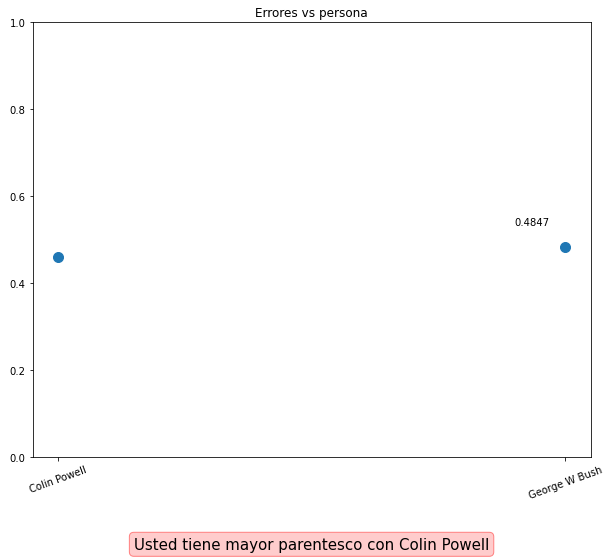

In [9]:
num_caras, ancho, alto, img_fila, Id, nombres, imagenes = inicializacion()
carpetas()
muestra_aleatoria()
rostro_promedio()
eigenfaces()
errores = Error()
parentesco(errores)
matriz, exacto, predicted = confusion()

In [10]:
exacto

['Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell

In [11]:
predicted

['Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell',
 'Colin Powell

In [12]:
matriz

array([[106,   0],
       [234,   0]])

In [13]:
#plt.imshow(eigen_vectors[:,-1].reshape(ancho,alto), cmap='gray')

In [14]:
#import matplotlib.pyplot as plt
#plt.imshow(imagenes[5], cmap='gray')

## Preguntas extra

(a) Prepara imágenes de los miembros del equipo ¿A quiénes se parecen?

(b) Utilizando los datos de _entrenamiento_ cuales son los valores máximo y mínimo en promedio de la distancia $E_j$. 

(c) Se dice lo siguiente:

_The input face is consider to belong to a class if εk is bellow an established threshold $\theta_\epsilon$. Then the face image is considered to be a known face. If the difference is above the given threshold, but bellow a second threshold, the image can be determined as a unknown face. If the input image is above these two thresholds, the image is determined NOT to be a face._

¿Se comprueba con las imágenes del equipo? ¿Qué pasa con imágenes que no son humanos?¿Y animales?

(d) Otra técnica que puede mejorar los resultados es restarle a todas las imágenes una _imagen promedio_ de _todas_ las imágenes antes de calcular $\mathcal{C}$. Repite los pasos ¿Cambia la matriz de confusión?

## Bibliografía

- [**Wikipedia**](http://en.wikipedia.org/wiki/Eigenface)
- [**Labeled Faces in the Wild (LFW) people dataset**](http://vis-www.cs.umass.edu/lfw/)
- **L. Sirovich and M. Kirby** (1987). _Low-dimensional procedure for the characterization of human faces_. `Journal of the Optical Society of America A 4 (3): 519–524`
- **M. Turk and A. Pentland** (1991). _Face recognition using eigenfaces_. `Proc. IEEE Conference on Computer Vision and Pattern Recognition. pp. 586–591.`
- **J. Nathan Kutz** (2013) _Data-Driven Modeling & Scientific Computation_ , `Oxford University Press` [link](http://dl.booktolearn.com/ebooks2/computer/computerscience/9780199660346_datadriven_modeling_and_scientific_computation_d739.pdf).